### This notebook is for the Coursera IBM Data Science capstone project

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Week 1

The problem is Seattle has car accidents that can be prevented.  Accidents happen at all times, but if the main causes of accidents are determined, advance warning or mitigating methods can be performed.  For example, certain intersections may be more susceptible to accidents due to heavy usage or the way they are constructed.  As a result, better street lights can be added (only protected left and right turns) or traffic personnel can be used to direct the cars.  If it is determined that accidents occur the majority of a time a driver is speeding, has a high blood alcohol level, or was not paying attention, the data can be used as evidence for enacting harsher laws and regulations.  In addition, the data can be advertised to the public to show them the consequences of driving under these conditions.  This will hopefully dissuade people in the future.  Finally, there are also uncontrollable factors such as weather and road conditions.  If certain patterns are discovered to cause many accidents, local government can know when to send alerts to the public to drive more cautiously or even avoid the roads entirely.

The target audience of this analysis is the Seattle government and transportation department.  It should identify key causes of accidents and allow them to identify trends for when accidents can be prevented.  This will reduce the number of accidents and injuries for the city. 

The data comes from collision and accident reports in Seattle during the years 2004-present.  It was collected by the Seattle Police Department and Traffic Records department.  The data will be used to identify the key variables that cause accidents.  For example, the "WEATHER" column can be used to show the types and number of accidents that occur for different categories.  In addition, the "INTKEY" column can be grouped and the sum of the accidents in that intersection can be calculated.  This list can be sorted descending to identify the more dangerous intersections that need improvements or closer monitoring.  Finally, a supervised learning model will be used to come up with a formula that can predict the severity of an accident based on the inputs.
The data has 37 independent variables and 194,673 records.  The dependent variable, "SEVERITYCODE", has numbers that correspond to different levels of severity caused by the accident.  Many of the columns are object types.  In addition, other columns that appear to be integer types are also actually objects, because the numbers correspond to different categories.  Finally, some columns and rows have null values, which will be dealt with during the data pre-processing phase.

# Week 2

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [145]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',dtype={'ST_COLCODE':str})

In [148]:
df.columns=[x.lower() for x in df.columns]

In [149]:
df.drop(['exceptrsncode','exceptrsndesc','severitycode.1',],axis=1,inplace=True)

In [150]:
df.head()

,severitycode,x,y,objectid,inckey,coldetkey,reportno,status,addrtype,intkey,location,severitydesc,collisiontype,personcount,pedcount,pedcylcount,vehcount,incdate,incdttm,junctiontype,sdot_colcode,sdot_coldesc,inattentionind,underinfl,weather,roadcond,lightcond,pedrownotgrnt,sdotcolnum,speeding,st_colcode,st_coldesc,seglanekey,crosswalkkey,hitparkedcar
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   severitycode    194673 non-null  int64  
 1   x               189339 non-null  float64
 2   y               189339 non-null  float64
 3   objectid        194673 non-null  int64  
 4   inckey          194673 non-null  int64  
 5   coldetkey       194673 non-null  int64  
 6   reportno        194673 non-null  object 
 7   status          194673 non-null  object 
 8   addrtype        192747 non-null  object 
 9   intkey          65070 non-null   float64
 10  location        191996 non-null  object 
 11  severitydesc    194673 non-null  object 
 12  collisiontype   189769 non-null  object 
 13  personcount     194673 non-null  int64  
 14  pedcount        194673 non-null  int64  
 15  pedcylcount     194673 non-null  int64  
 16  vehcount        194673 non-null  int64  
 17  incdate   

In [152]:
df.columns[df.isnull().sum()>79000]

Index(['intkey', 'inattentionind', 'pedrownotgrnt', 'sdotcolnum', 'speeding'], dtype='object')

In [153]:
df.drop(['inattentionind', 'pedrownotgrnt', 'sdotcolnum', 'speeding'],axis=1,inplace=True)

In [154]:
dfwithint=df.copy()
df.drop('intkey',axis=1,inplace=True)

In [155]:
ser=dfwithint['intkey'].value_counts()
dfint=ser.to_frame()
dfint.reset_index(inplace=True)
dfint.columns=['Intersection',"# of accidents"]
dfint

,Intersection,# of accidents
0,29973.0,252
1,29933.0,160
2,29913.0,138
3,29549.0,136
4,33512.0,128
...,...,...
7609,36825.0,1
7610,26604.0,1
7611,26603.0,1
7612,36816.0,1


In [156]:
df.columns

Index(['severitycode', 'x', 'y', 'objectid', 'inckey', 'coldetkey', 'reportno',
       'status', 'addrtype', 'location', 'severitydesc', 'collisiontype',
       'personcount', 'pedcount', 'pedcylcount', 'vehcount', 'incdate',
       'incdttm', 'junctiontype', 'sdot_colcode', 'sdot_coldesc', 'underinfl',
       'weather', 'roadcond', 'lightcond', 'st_colcode', 'st_coldesc',
       'seglanekey', 'crosswalkkey', 'hitparkedcar'],
      dtype='object')

In [157]:
df['hitparkedcar']=pd.get_dummies(df['hitparkedcar'])['Y']

In [182]:
df['underinfl'].replace({'N':int(0),'Y':int(1),'0':int(0),'1':int(1)},inplace=True)

In [175]:
x=['severitycode','addrtype','collisiontype',
       'personcount', 'pedcount', 'pedcylcount', 'vehcount', 'junctiontype', 'sdot_colcode', 'sdot_coldesc', 'underinfl',
       'weather', 'roadcond', 'lightcond', 'st_colcode',
       'seglanekey', 'crosswalkkey', 'hitparkedcar']

In [183]:
for a in x:
    print(df[a].value_counts())
    print('')

1    136485
2     58188
Name: severitycode, dtype: int64

Block           126926
Intersection     65070
Alley              751
Name: addrtype, dtype: int64

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: collisiontype, dtype: int64

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81        

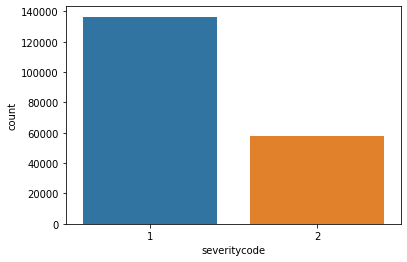

In [187]:
sns.countplot(x='severitycode',data=df)

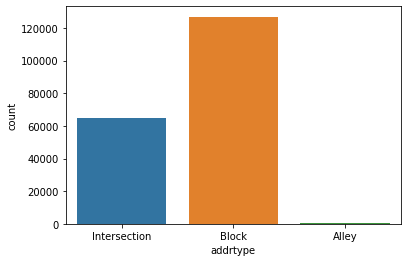

In [188]:
sns.countplot(x='addrtype',data=df)

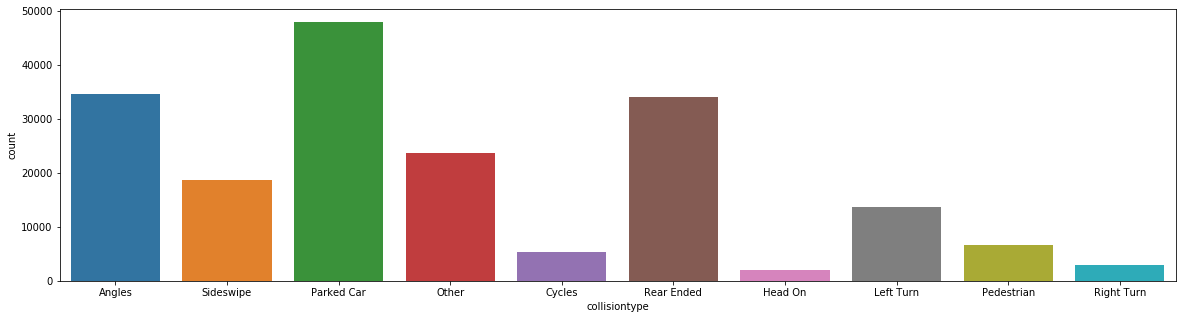

In [219]:
plt.figure(figsize=(20,5))
sns.countplot(x='collisiontype',data=df)

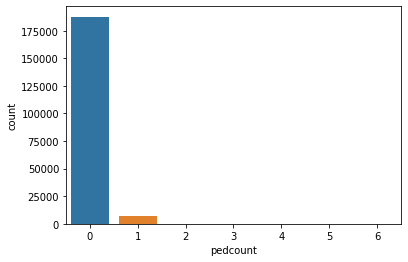

In [193]:
sns.countplot(x='pedcount',data=df)

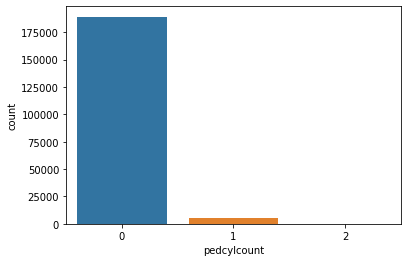

In [194]:
sns.countplot(x='pedcylcount',data=df)

In [195]:
x2=['severitycode','addrtype','collisiontype','pedcount', 'pedcylcount', 'vehcount', 'junctiontype','underinfl',
       'weather', 'roadcond', 'lightcond']

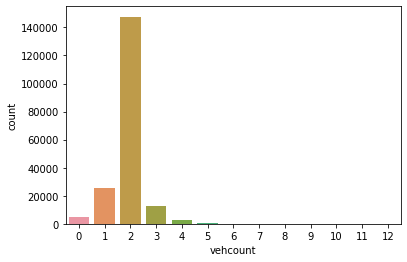

In [196]:
sns.countplot(x='vehcount',data=df)

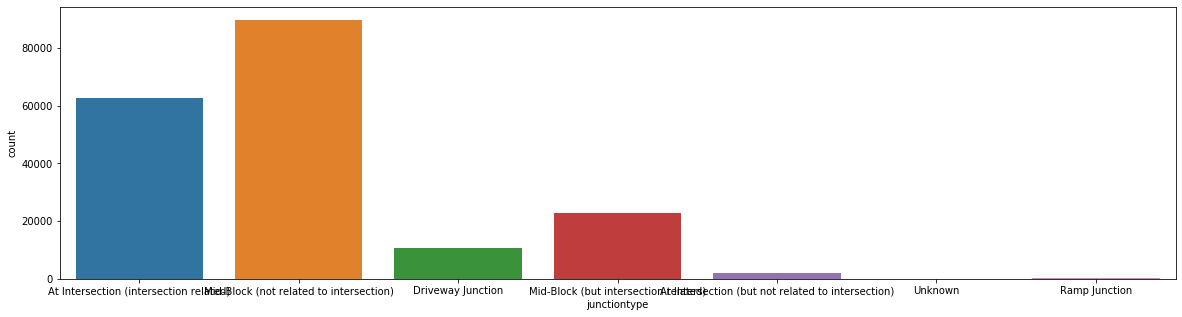

In [218]:
plt.figure(figsize=(20,5))
sns.countplot(x='junctiontype',data=df)

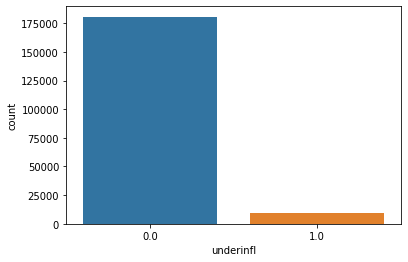

In [198]:
sns.countplot(x='underinfl',data=df)

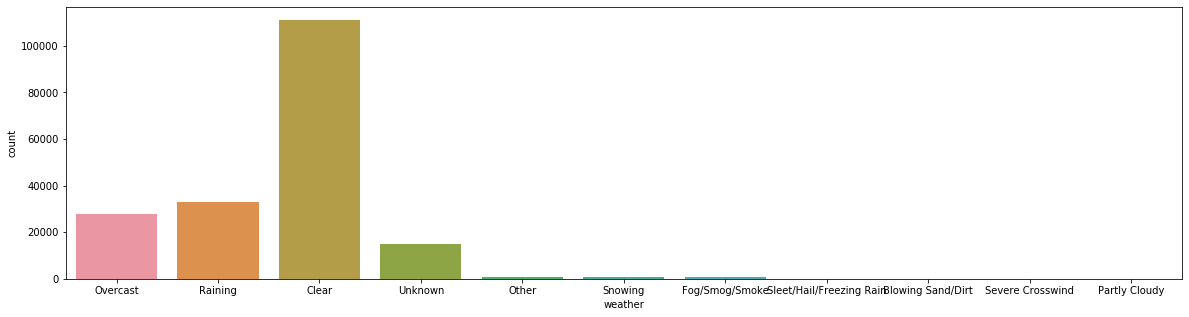

In [217]:
plt.figure(figsize=(20,5))
sns.countplot(x='weather',data=df)

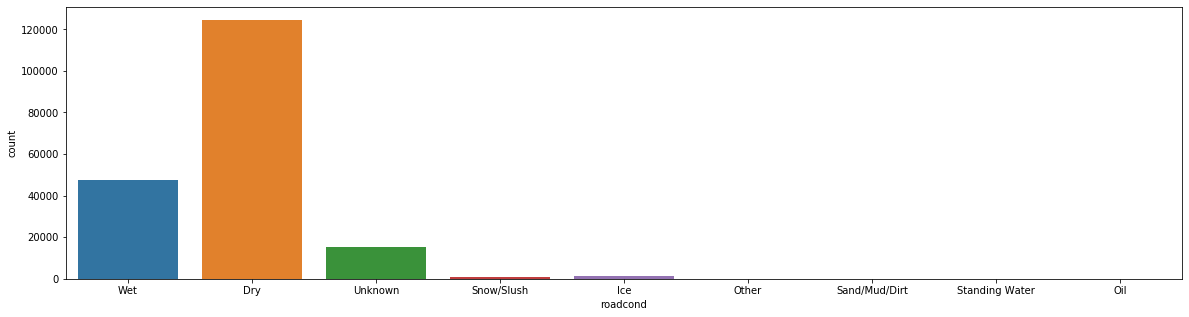

In [216]:
plt.figure(figsize=(20,5))
sns.countplot(x='roadcond',data=df)

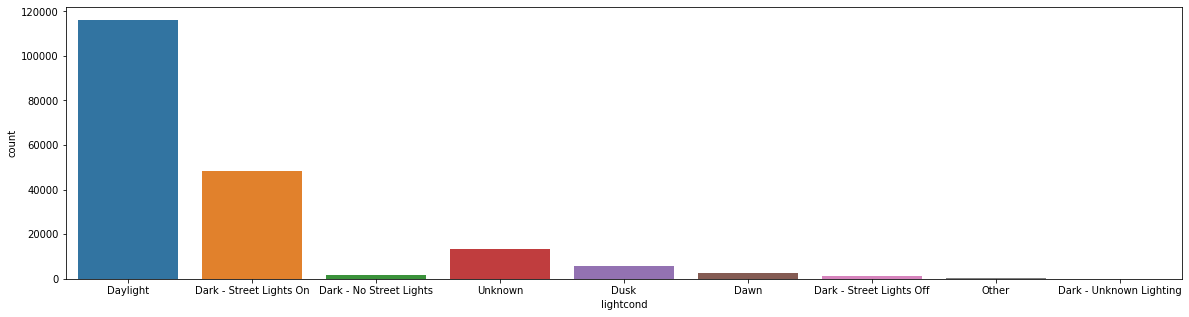

In [220]:
plt.figure(figsize=(20,5))
sns.countplot(x='lightcond',data=df)